In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and Inspect Data

In [77]:
# Load the dataset
df = pd.read_csv("../data/training_v2.csv")

# Shape
print("Shape of dataset:", df.shape)

Shape of dataset: (91713, 186)


In [78]:
# First few rows
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [79]:
# Average statistics
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# Duplicated rows based on encounter_id
duplicate_encounters = df['encounter_id'].duplicated().sum()
print("Duplicate encounter_id entries:", duplicate_encounters)

# Duplicated rows based on patient_id
duplicate_patients = df['patient_id'].duplicated().sum()
print("Duplicate patient_id entries:", duplicate_patients)

Duplicate encounter_id entries: 0
Duplicate patient_id entries: 0


# Missing Values

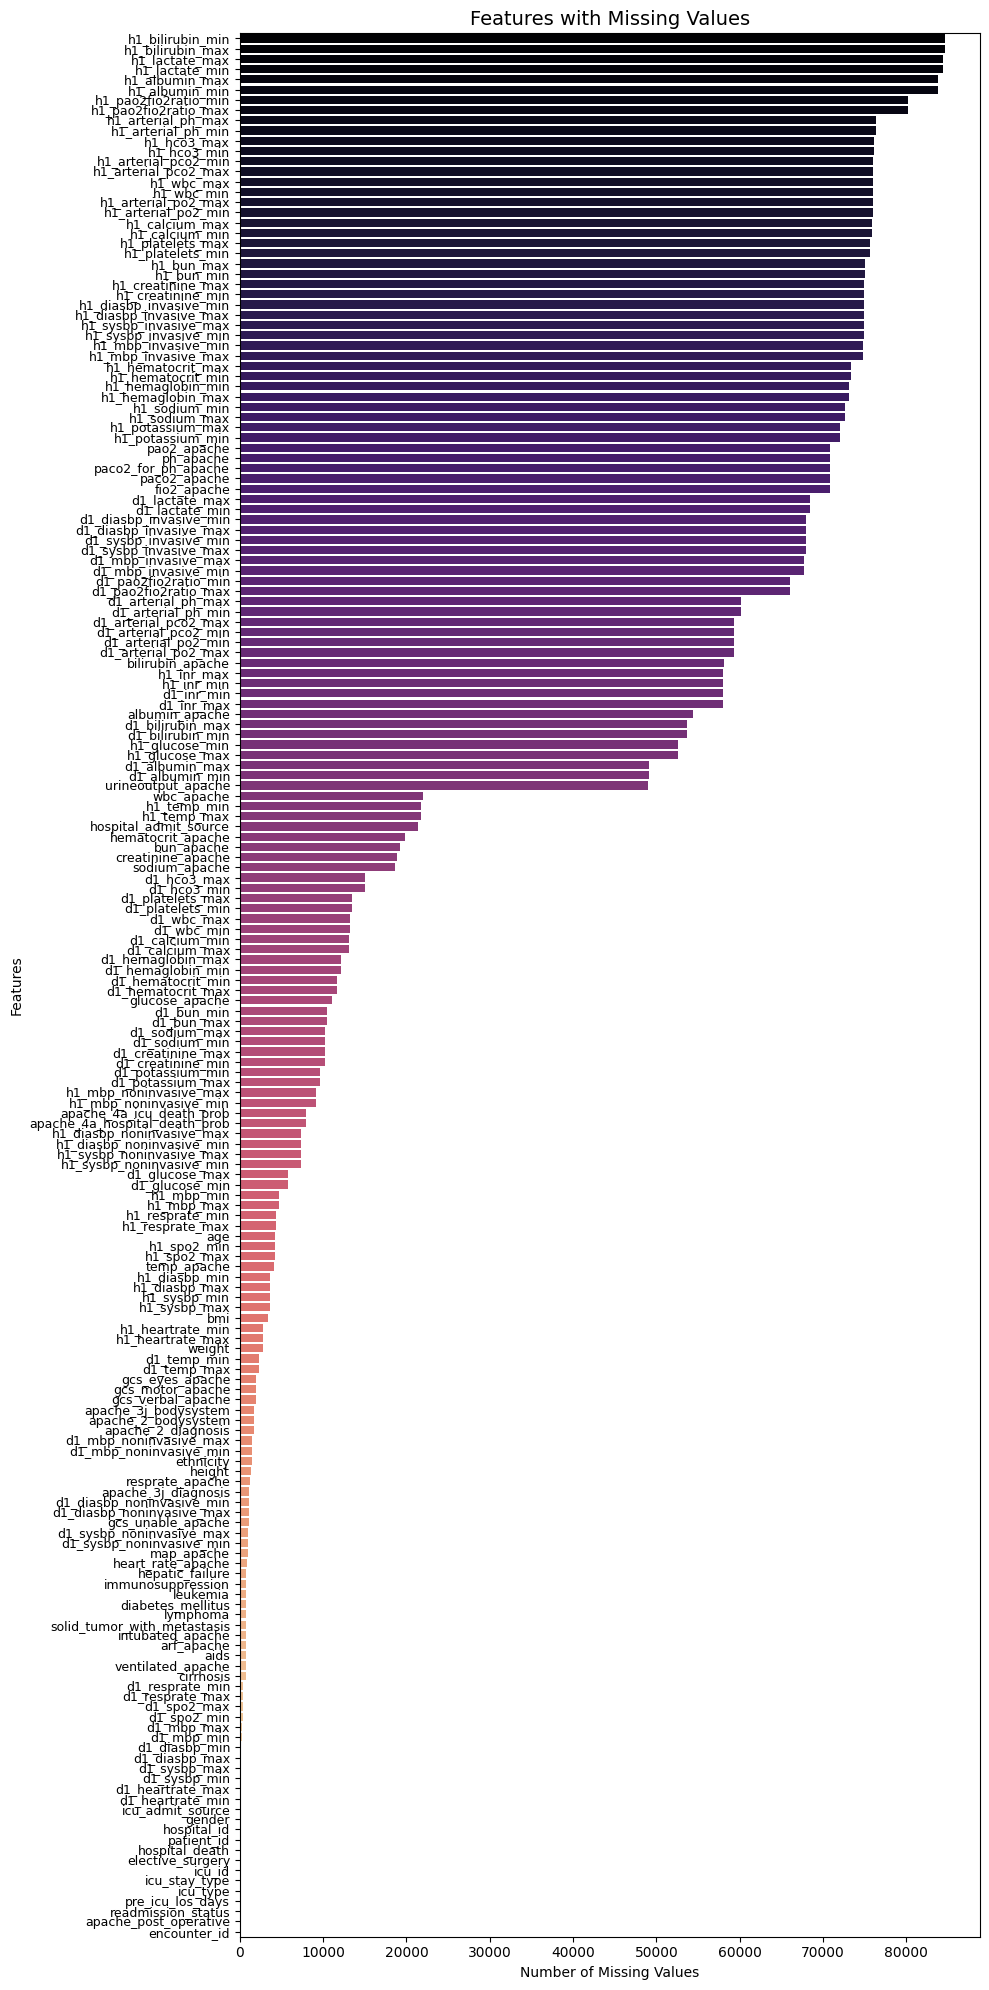

In [82]:
# Get missing value counts 
missing_counts = df.isnull().sum()
missing_counts = missing_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 20))
sns.barplot(
    x=missing_counts.values,
    y=missing_counts.index,
    hue=missing_counts.index,
    dodge=False,
    palette="magma",
    legend=False
)
plt.title("Features with Missing Values", fontsize=14)
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.tick_params(axis='y', labelsize=9)
plt.tight_layout()

In [83]:
missing_pct = df['hospital_death'].isnull().mean() * 100
print(f"Missing percentage for 'hospital_death': {missing_pct:.2f}%")

Missing percentage for 'hospital_death': 0.00%


In [84]:
# Remove the features with more than 50% missing values 

missing_percent = df.isnull().mean() * 100
df_filtered = df.loc[:, missing_percent <= 50]

print("Shape before:", df.shape)
print("Shape after dropping columns with >50% missing:", df_filtered.shape)

df = df_filtered

# Remove readmisison status becausesame value for all observations
df = df.drop(columns=['readmission_status'])

Shape before: (91713, 186)
Shape after dropping columns with >50% missing: (91713, 112)


In [85]:
df.columns.tolist()

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_

In [86]:

# 1. Decide the most relevant predictors
# 2. Compute missing values if any remaining 
# 3. Deal with class imbalance
# 4. Standardize data
# 5. Encode categorical variables
# 6. Pass our proposal to ChatGPT and figure out the rest 
# 7. Fit baseline models (before DP)

# Important Predictors

In [88]:
df = df.drop(columns=[
    'encounter_id', 'patient_id', 'hospital_id', 'icu_id'
], errors='ignore')

target = 'hospital_death'

# Define binary columns 
binary_cols = [
    'elective_surgery', 'apache_post_operative', 'arf_apache',
    'intubated_apache', 'ventilated_apache', 'gcs_unable_apache',
    'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
    'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis'
]

# Define categorical columns 
categorical_cols = [
    'gender', 'ethnicity', 'hospital_admit_source', 'icu_admit_source',
    'icu_stay_type', 'icu_type',
    'apache_2_diagnosis', 'apache_3j_diagnosis',
    'apache_3j_bodysystem', 'apache_2_bodysystem'
]

# Everything else that’s not the target or in the above lists is assumed numerical
used_cols = [target] + binary_cols + categorical_cols
numerical_cols = [col for col in df.columns if col not in used_cols]

print(f"Target: {target}")
print(f"\nBinary columns ({len(binary_cols)}): {binary_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols[:10]}... [+{len(numerical_cols)-10} more]" if len(numerical_cols) > 10 else numerical_cols)

Target: hospital_death

Binary columns (14): ['elective_surgery', 'apache_post_operative', 'arf_apache', 'intubated_apache', 'ventilated_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

Categorical columns (10): ['gender', 'ethnicity', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_3j_bodysystem', 'apache_2_bodysystem']

Numerical columns (82): ['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']... [+72 more]


In [89]:
numerical_df=df[numerical_cols]

corr_matrix = numerical_df.corr().abs()
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
strong_corr = upper_tri.stack().reset_index()
strong_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_corr = strong_corr[strong_corr['Correlation'] > 0.8].sort_values(by='Correlation', ascending=False)

# Print results
print("Strongly Correlated Feature Pairs (|correlation| > 0.8):")
print(strong_corr.to_string(index=False))


Strongly Correlated Feature Pairs (|correlation| > 0.8):
                    Feature 1                 Feature 2  Correlation
                d1_diasbp_max d1_diasbp_noninvasive_max     0.997831
                d1_diasbp_min d1_diasbp_noninvasive_min     0.996871
                   h1_mbp_min    h1_mbp_noninvasive_min     0.996673
                 d1_sysbp_max  d1_sysbp_noninvasive_max     0.996560
                 h1_sysbp_max  h1_sysbp_noninvasive_max     0.996377
                 d1_sysbp_min  d1_sysbp_noninvasive_min     0.996322
                   d1_mbp_min    d1_mbp_noninvasive_min     0.995532
            creatinine_apache         d1_creatinine_max     0.993802
                 h1_sysbp_min  h1_sysbp_noninvasive_min     0.988018
                   h1_mbp_max    h1_mbp_noninvasive_max     0.986584
                   bun_apache                d1_bun_max     0.986565
                   d1_mbp_max    d1_mbp_noninvasive_max     0.984703
                h1_diasbp_max h1_diasbp_noninv

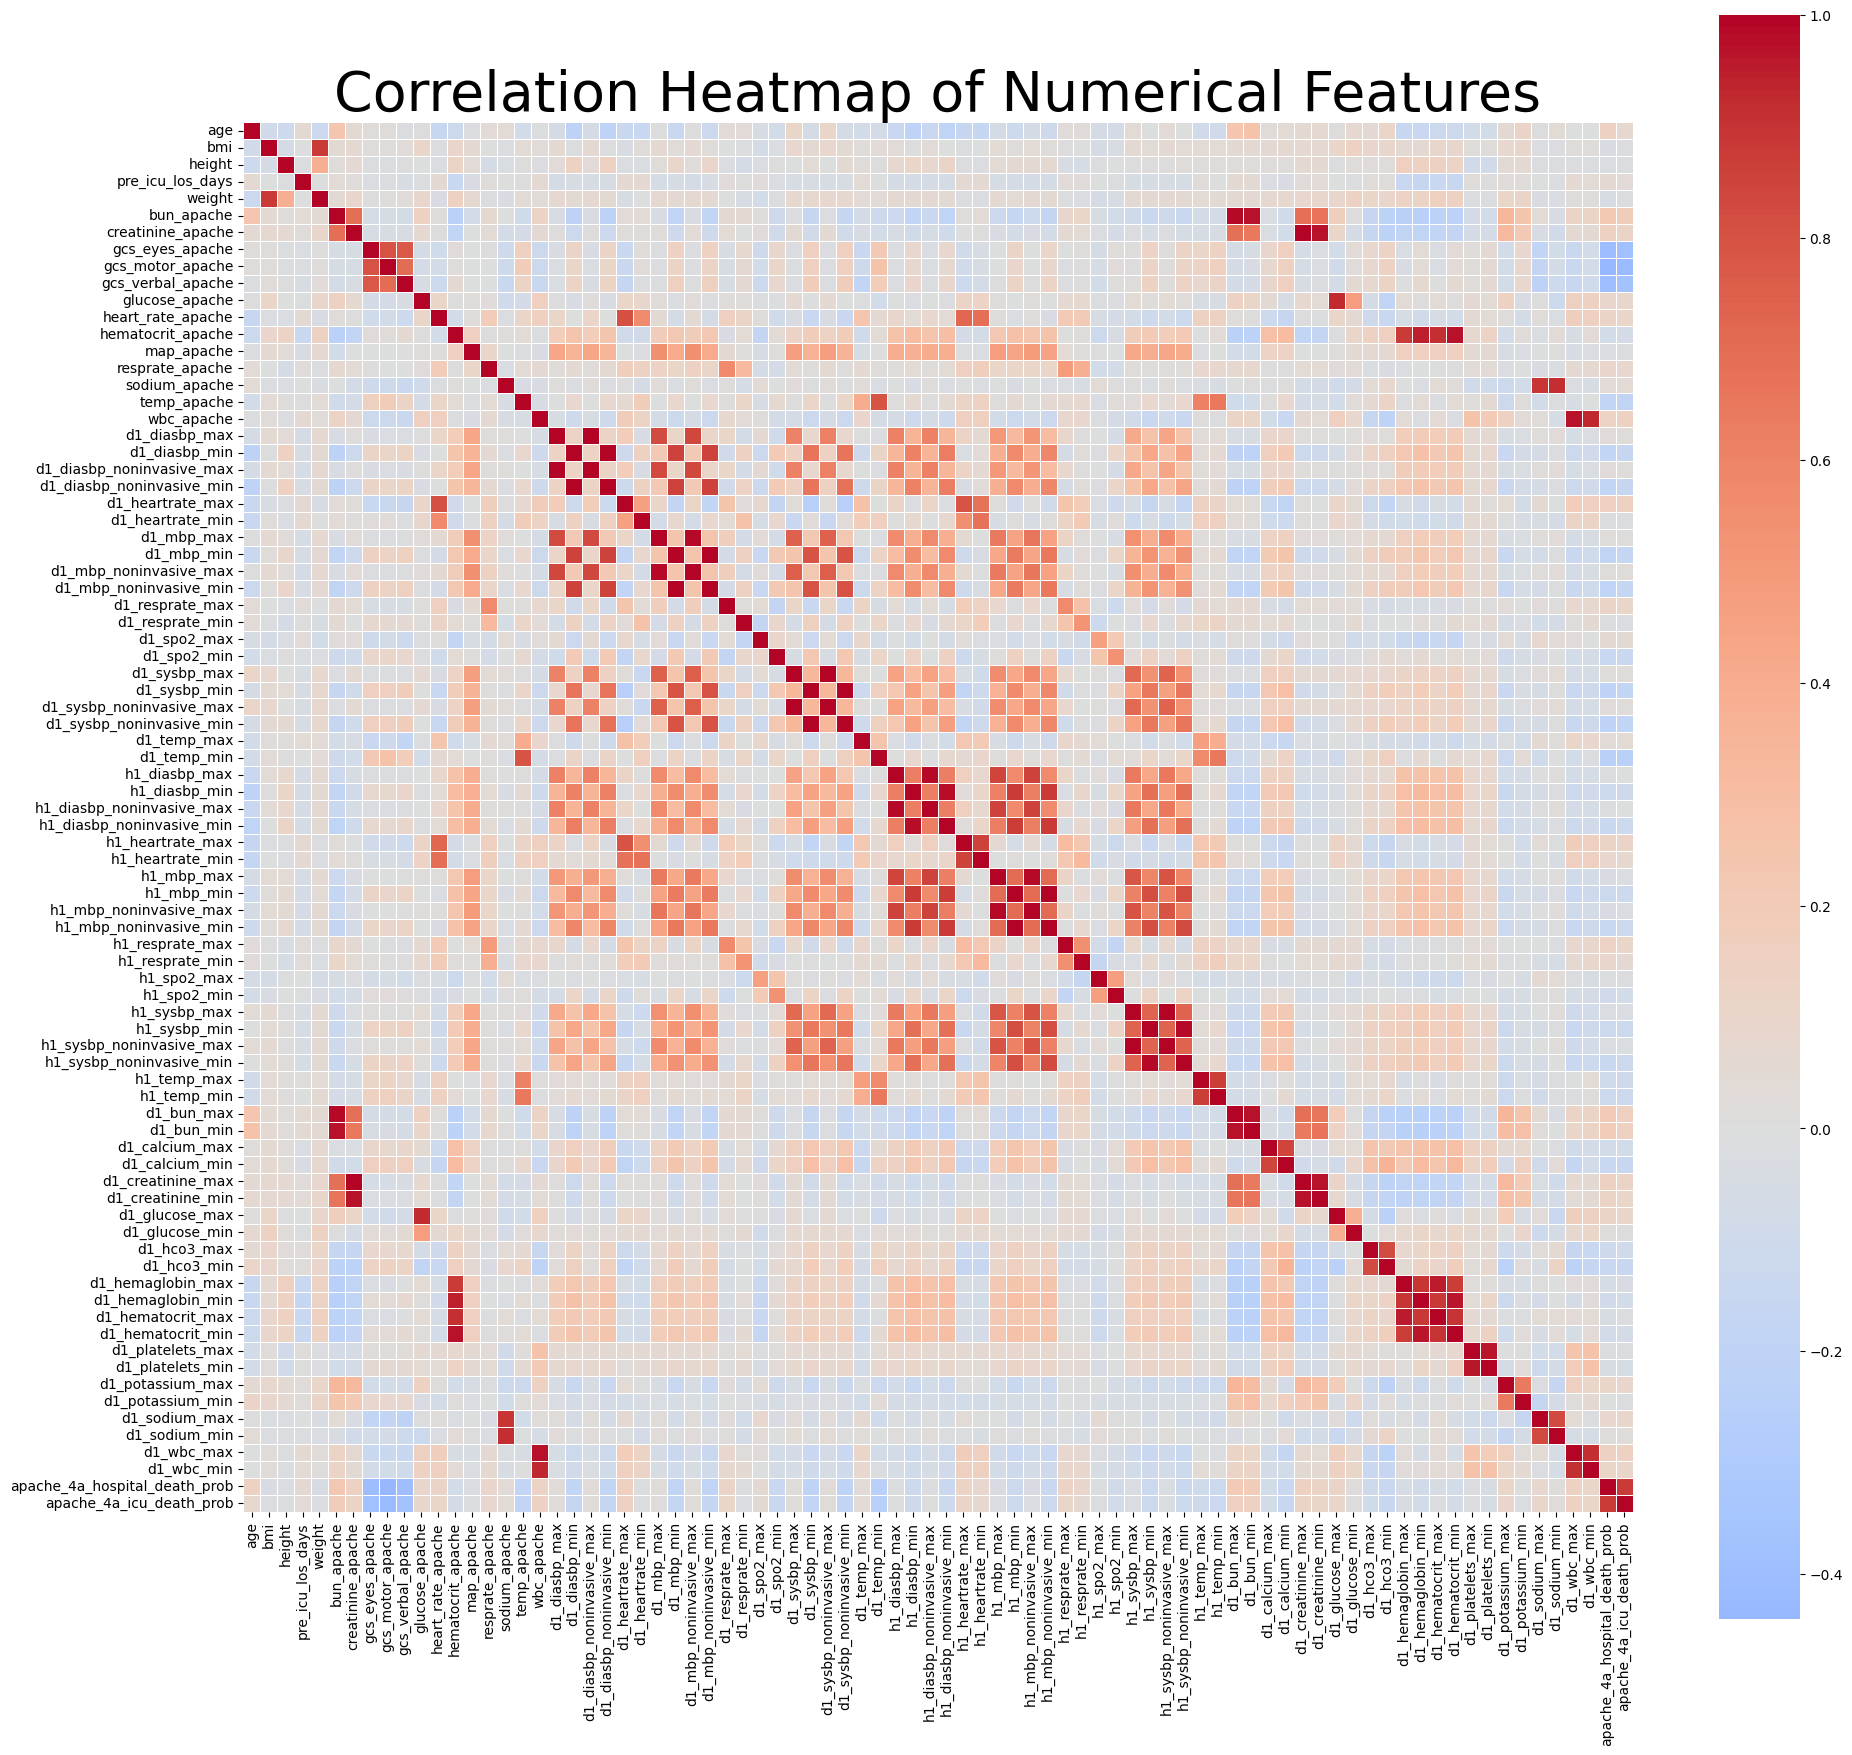

In [90]:
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=40)
plt.tight_layout()

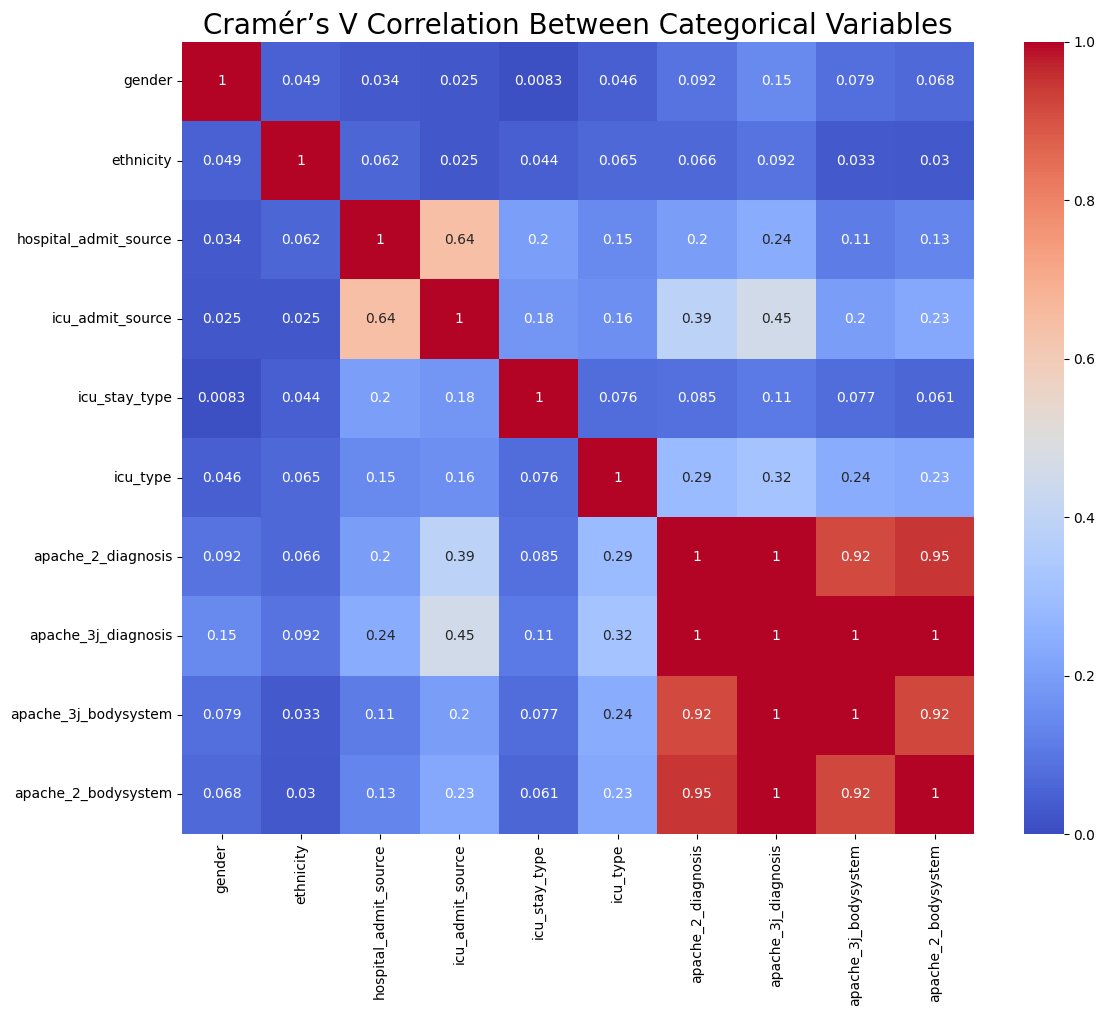

In [91]:
def cramers_v(x, y):
    x = x.astype(str)
    y = y.astype(str)
    if x.nunique() < 2 or y.nunique() < 2:
        return np.nan
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan
    chi2 = ss.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Prevent division by zero
    if (kcorr := k - ((k - 1) ** 2) / (n - 1)) <= 1 or (rcorr := r - ((r - 1) ** 2) / (n - 1)) <= 1:
        return np.nan
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    
cramer_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            try:
                cramer_matrix.loc[col1, col2] = cramers_v(df[col1].astype(str), df[col2].astype(str))
            except:
                cramer_matrix.loc[col1, col2] = np.nan
                
# Convert to float for plotting
cramer_matrix = cramer_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, square=True)
plt.title("Cramér’s V Correlation Between Categorical Variables", fontsize=20)
plt.tight_layout()

In [92]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("\nCramér's V Correlation Matrix (Categorical Features):")
    print(cramer_matrix.round(3))


Cramér's V Correlation Matrix (Categorical Features):
                       gender  ethnicity  hospital_admit_source  \
gender                  1.000      0.049                  0.034   
ethnicity               0.049      1.000                  0.062   
hospital_admit_source   0.034      0.062                  1.000   
icu_admit_source        0.025      0.025                  0.641   
icu_stay_type           0.008      0.044                  0.200   
icu_type                0.046      0.065                  0.147   
apache_2_diagnosis      0.092      0.066                  0.199   
apache_3j_diagnosis     0.146      0.092                  0.239   
apache_3j_bodysystem    0.079      0.033                  0.112   
apache_2_bodysystem     0.068      0.030                  0.134   

                       icu_admit_source  icu_stay_type  icu_type  \
gender                            0.025          0.008     0.046   
ethnicity                         0.025          0.044     0.065   
hos

In [93]:
drop_cols = [
    # Noninvasive duplicates
    'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min',
    'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
    'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
    'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
    'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
    
    # Redundant Apache-derived day 1 values
    'd1_creatinine_max', 'd1_creatinine_min',
    'd1_bun_max', 'd1_bun_min',
    'd1_wbc_max', 'd1_wbc_min',
    'd1_glucose_max',
    'd1_sodium_max', 'd1_sodium_min',
    'd1_hematocrit_max', 'd1_hematocrit_min',
    'd1_hemaglobin_max', 'd1_hemaglobin_min',
    'd1_temp_min',  # keep only h1_temp_max
    'h1_temp_min',
    'd1_heartrate_max',  # keep apache version
    
    # Other redundant or derived vars
    'apache_4a_icu_death_prob',
    'weight',  # keep bmi
    'height',
    'gcs_eyes_apache', 'gcs_verbal_apache',  # keep motor only

    # Categorical redundancy based on Cramér's V
    'apache_3j_diagnosis',
    'apache_3j_bodysystem',
    'apache_2_bodysystem'
]

df_clean = df.drop(columns=drop_cols, errors='ignore')


# Impute Remaining Missing Values

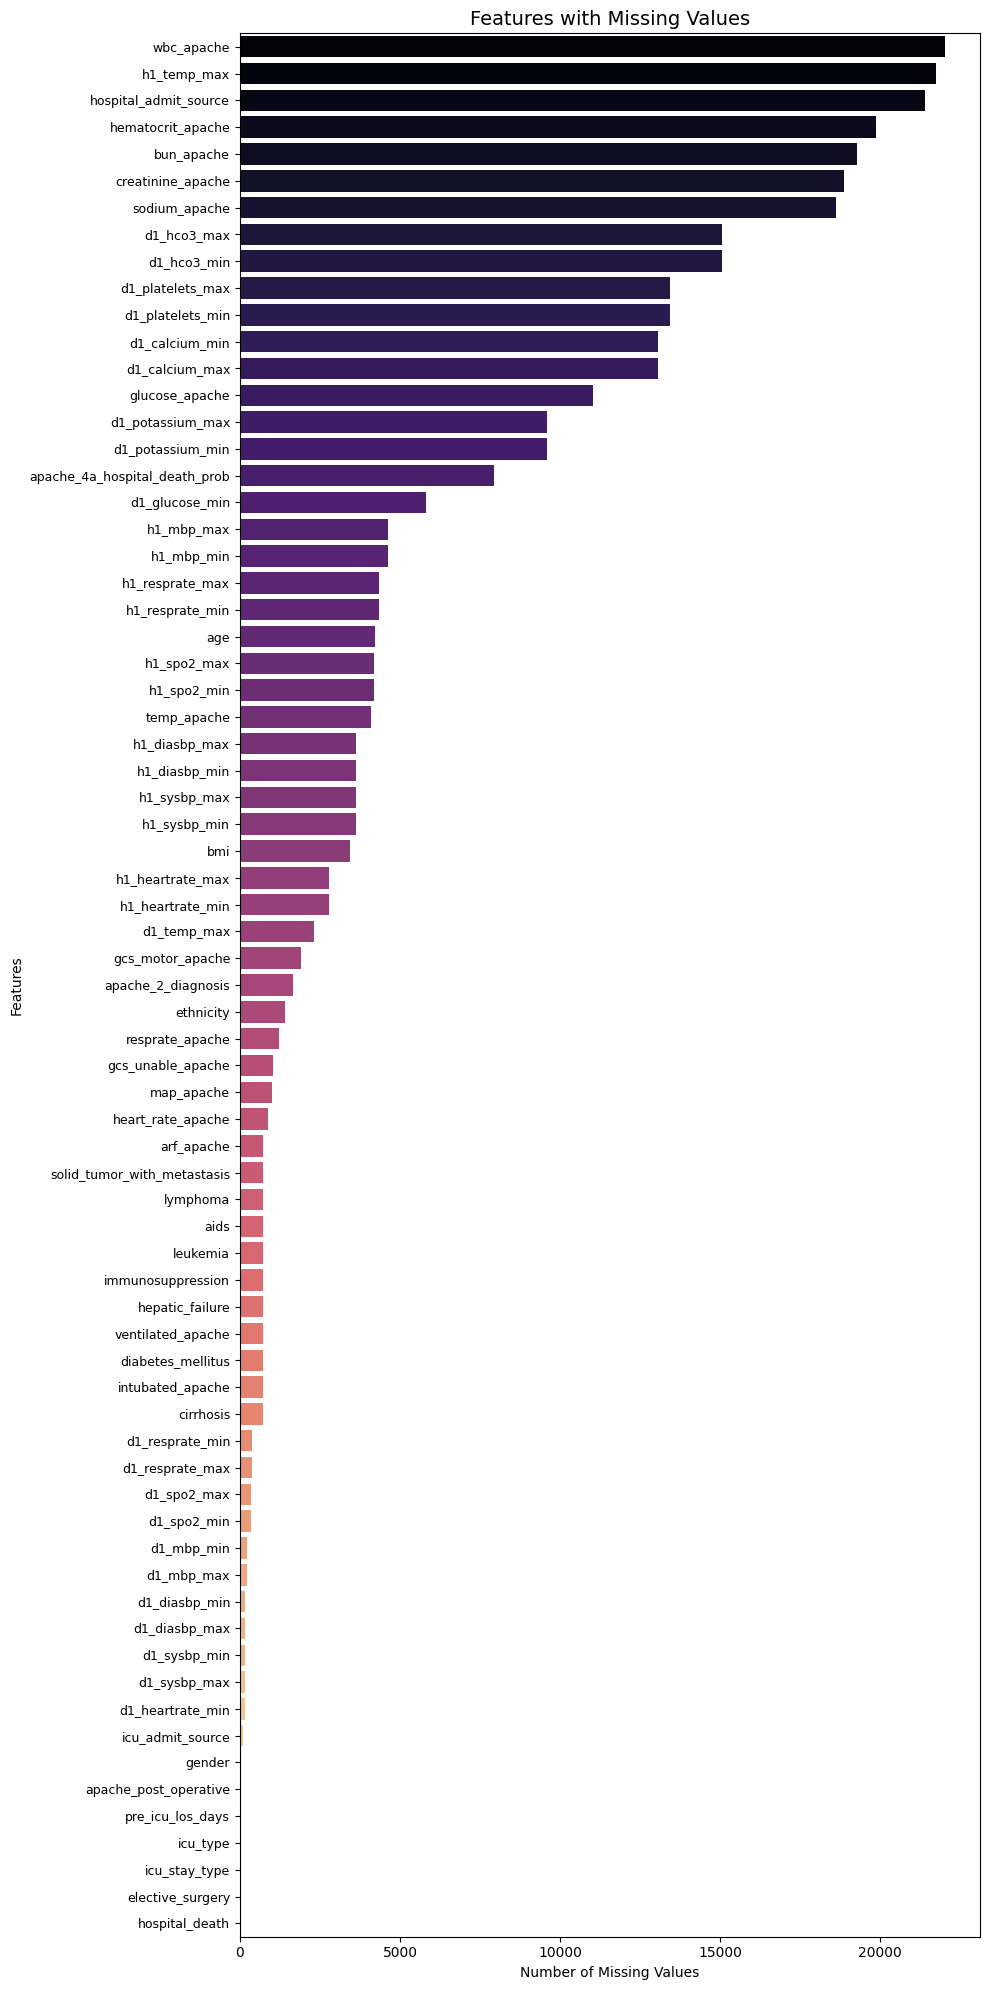

In [95]:
missing_counts = df_clean.isnull().sum()
missing_counts = missing_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 20))
sns.barplot(
    x=missing_counts.values,
    y=missing_counts.index,
    hue=missing_counts.index,
    dodge=False,
    palette="magma",
    legend=False
)
plt.title("Features with Missing Values", fontsize=14)
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.tick_params(axis='y', labelsize=9)
plt.tight_layout()

In [96]:
df_clean.columns.tolist()

['hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'apache_2_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_temp_max',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_temp_max',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_gluc

In [97]:
missing_info = df_clean.isnull().sum().reset_index()
missing_info.columns = ['feature', 'missing_count']
missing_info['missing_percent'] = 100 * missing_info['missing_count'] / len(df_clean)
missing_info = missing_info.sort_values(by='missing_percent', ascending=False)

# Print all rows without truncation
pd.set_option('display.max_rows', None)
print(missing_info)

                          feature  missing_count  missing_percent
27                     wbc_apache          22012        24.000960
52                    h1_temp_max          21732        23.695659
6           hospital_admit_source          21409        23.343474
20              hematocrit_apache          19878        21.674136
14                     bun_apache          19262        21.002475
15              creatinine_apache          18853        20.556519
24                  sodium_apache          18600        20.280658
56                    d1_hco3_max          15071        16.432785
57                    d1_hco3_min          15071        16.432785
58               d1_platelets_max          13444        14.658772
59               d1_platelets_min          13444        14.658772
54                 d1_calcium_min          13069        14.249888
53                 d1_calcium_max          13069        14.249888
18                 glucose_apache          11036        12.033190
60        

In [98]:
numerical_vars_clean = [
    'age', 'bmi', 'pre_icu_los_days',
    'bun_apache', 'creatinine_apache', 'glucose_apache', 'heart_rate_apache',
    'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache',
    'temp_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_min',
    'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min',
    'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max',
    'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max', 'h1_heartrate_min',
    'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max', 'h1_resprate_min',
    'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_temp_max',
    'd1_calcium_max', 'd1_calcium_min', 'd1_glucose_min', 'd1_hco3_max',
    'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min',
    'd1_potassium_max', 'd1_potassium_min',
    'apache_4a_hospital_death_prob', 'gcs_motor_apache'
]

categorical_vars_clean = [
    'ethnicity', 'gender',
    'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type',
    'apache_2_diagnosis'
]

binary_vars_clean = [
    'elective_surgery', 'apache_post_operative', 'arf_apache',
    'gcs_unable_apache', 'intubated_apache',
    'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus',
    'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
    'solid_tumor_with_metastasis'
]

In [99]:
for col in categorical_vars_clean:
    if df_clean[col].dtype == 'object' or df_clean[col].nunique() < 20:
        if df_clean[col].isnull().mean() > 0.10:
            df_clean[col] = df_clean[col].fillna('Unknown')
        else:
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# For all remaining numeric columns: median imputation
numeric_cols = df_clean.select_dtypes(include=['number']).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

for col in binary_vars_clean:
    df_clean[col] = df_clean[col].apply(lambda x: 1 if x == 1 else 0)

print("Any missing values left?")
print(df_clean.isnull().sum().sum()) 

Any missing values left?
0


# Encoding

In [101]:
onehot_vars = [
    'ethnicity', 'hospital_admit_source', 'icu_admit_source',
    'icu_stay_type', 'icu_type', 'apache_2_diagnosis'
]

df_encoded = pd.get_dummies(df_clean, columns=onehot_vars, drop_first=True)

In [102]:
df_encoded['gender'] = df_clean['gender'].map({'M': 0, 'F': 1})  

In [103]:
df_encoded['hospital_death']= df['hospital_death']

In [104]:
df_encoded.head()

,hospital_death,age,bmi,elective_surgery,gender,pre_icu_los_days,apache_post_operative,arf_apache,bun_apache,creatinine_apache,...,apache_2_diagnosis_218.0,apache_2_diagnosis_219.0,apache_2_diagnosis_301.0,apache_2_diagnosis_302.0,apache_2_diagnosis_303.0,apache_2_diagnosis_304.0,apache_2_diagnosis_305.0,apache_2_diagnosis_306.0,apache_2_diagnosis_307.0,apache_2_diagnosis_308.0
0,0,68.0,22.730000,0,0,0.541667,0,0,31.0,2.51,...,False,False,False,False,False,False,False,False,False,False
1,0,77.0,27.420000,0,1,0.927778,0,0,9.0,0.56,...,False,False,False,False,False,False,False,False,False,False
2,0,25.0,31.950000,0,1,0.000694,0,0,19.0,0.98,...,False,False,False,False,False,False,False,False,False,False
3,0,81.0,22.640000,1,1,0.000694,1,0,19.0,0.98,...,False,False,False,False,False,False,False,False,False,False
4,0,19.0,27.654655,0,0,0.073611,0,0,19.0,0.98,...,False,False,False,False,False,False,False,False,False,False


# Class Imbalance

Mortality counts:
hospital_death
0    83798
1     7915
Name: count, dtype: int64


Text(0, 0.5, 'Count')

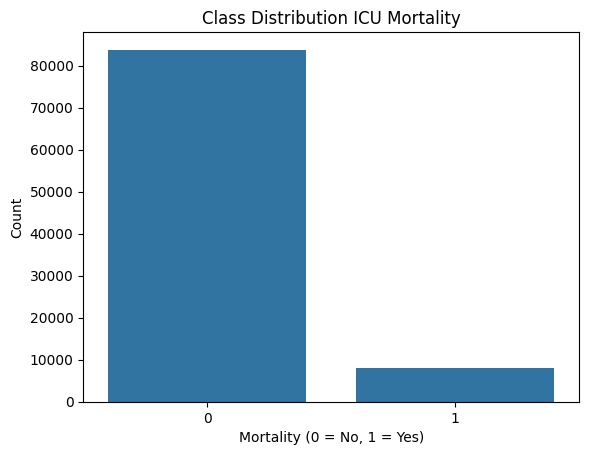

In [106]:
# Visualize 
class_counts = df_encoded['hospital_death'].value_counts()
print("Mortality counts:")
print(class_counts)

sns.countplot(data=df, x='hospital_death')
plt.title("Class Distribution ICU Mortality")
plt.xlabel("Mortality (0 = No, 1 = Yes)")
plt.ylabel("Count")


We will balance the classes dircetly in the modelling. e.g. class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=df_encoded['hospital_death'])

# Standardization

In [109]:
X = df_encoded.drop(columns='hospital_death')
y = df_encoded['hospital_death']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2080, stratify=y)

In [115]:
numeric_to_standardize = [
    col for col in X_train.columns 
    if col not in categorical_vars_clean + binary_vars_clean and X_train[col].dtype in ['float64', 'int64']
]

# Initialize and fit scaler on training data
scaler = StandardScaler()
X_train[numeric_to_standardize] = scaler.fit_transform(X_train[numeric_to_standardize])
X_test[numeric_to_standardize] = scaler.transform(X_test[numeric_to_standardize])


In [117]:
X_train.head()

,age,bmi,elective_surgery,gender,pre_icu_los_days,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_motor_apache,...,apache_2_diagnosis_218.0,apache_2_diagnosis_219.0,apache_2_diagnosis_301.0,apache_2_diagnosis_302.0,apache_2_diagnosis_303.0,apache_2_diagnosis_304.0,apache_2_diagnosis_305.0,apache_2_diagnosis_306.0,apache_2_diagnosis_307.0,apache_2_diagnosis_308.0
44859,-2.467390,0.018740,0,0,-0.307972,1,0,-0.612535,-0.564234,0.405439,...,False,False,False,False,False,True,False,False,False,False
73434,0.706394,-1.245324,0,0,-0.226068,0,0,-0.666347,-0.564234,0.405439,...,False,False,False,False,False,False,False,False,False,False
4335,0.706394,-0.180558,1,0,-0.336764,1,0,-0.289661,-0.287850,0.405439,...,False,False,False,False,False,False,False,False,False,False
8555,-2.650493,-0.272220,0,0,-0.332851,0,0,-0.881597,-0.273303,0.405439,...,False,False,False,False,False,False,False,False,False,False
21312,0.401223,-0.416137,1,1,-0.237250,1,0,1.486149,0.192186,0.405439,...,False,False,False,False,False,False,False,False,False,False


In [121]:
df_train = X_train.copy()
df_train['hospital_death'] = y_train

df_test = X_test.copy()
df_test['hospital_death'] = y_test

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)


Train shape: (73370, 141)
Test shape: (18343, 141)


In [123]:
df_train.to_csv("../data/icu_train.csv", index=False)
df_test.to_csv("icu_test.csv", index=False)